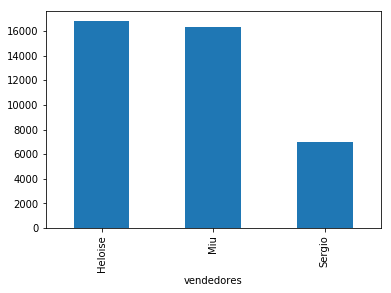

In [171]:
import pandas as pd, numpy as np, tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
%matplotlib inline

datas = pd.date_range(start = '2020-1-1', end = '2020-12-31', freq = 'd')
vendedores = np.random.choice(['Sergio','Heloise','Miu',], len(indice))
frutas = np.random.choice(['maca','banana','pera','uva','melancia','laranja'], len(indice))
qtd_vendida = np.random.randint(1,50,len(indice))
comissao = np.random.choice([0,1],len(indice))

df = pd.DataFrame({'data_venda':datas,
'vendedores':vendedores,
'frutas':frutas,
'qtd_vendida':qtd_vendida,
'desconto': comissao})

preco = {'maca':5,
'banana':2,
'pera':4,
'uva':20,
'melancia':30,
'laranja':10}

df.loc[df.vendedores == 'Sergio', 'qtd_vendida'] = df.loc[df.vendedores == 'Sergio', 'qtd_vendida']*(1/3)


df.loc[:'2020-6-1','qtd_vendida'] = df.loc[:'2020-6-1','qtd_vendida'] * (1/3)
df.loc[df.frutas == 'uva','qtd_vendida'] = df.loc[df.frutas == 'uva','qtd_vendida'] * (1/3)

for x in preco.keys():
    df.loc[df.frutas == x, 'valor_venda']  = df.qtd_vendida*preco[x]
df.loc[df.desconto == 1, 'valor_venda'] = df.loc[df.desconto == 1, 'valor_venda']*0.9

df.groupby('vendedores').valor_venda.sum().plot('bar')



In [173]:
w = tk.Tk()
w.geometry('400x200')
def click_me():


    
    
    venda_total = df[df.vendedores == number_chosen.get()].valor_venda.sum()
    qtd_vendas = df[df.vendedores == number_chosen.get()].valor_venda.size
    ttk.Label(w, text = '                                                                             ').grid(column = 1, row = 3)
    ttk.Label(w, text = f'venda total: R$ {round(venda_total,2):,}').grid(column = 1, row = 5)
    ttk.Label(w, text = f'Qtd de vendas: {qtd_vendas}').grid(column = 1, row = 6)

    com = int(chcom.get())
    
    venda_total = df[(df.vendedores == number_chosen.get() )&(df.desconto == com)].valor_venda.sum()
    qtd_vendas = df[(df.vendedores == number_chosen.get() )&(df.desconto == com)].valor_venda.size
    ttk.Label(w, text = '                                                                             ').grid(column = 1, row = 3)
    ttk.Label(w, text = f'venda total: R$ {round(venda_total,2):,}').grid(column = 2, row = 5)
    ttk.Label(w, text = f'Qtd de vendas: {qtd_vendas}').grid(column = 2, row = 6)



# adding a button
action = ttk.Button(w, text = 'click me!', command = click_me)
action.grid(column = 1, row = 2)

# creating three checkbuttons
ttk.Label(w, text = 'Escolha um vendedor').grid(column = 1, row = 0)
number = tk.StringVar()

number_chosen = ttk.Combobox(w, width = 12, textvariable = number, state = 'readonly')
number_chosen['values'] = tuple(df.vendedores.unique())
number_chosen.grid(column = 1, row = 1)
number_chosen.current(0)


chcom = tk.IntVar()
check1 = tk.Checkbutton(w, text = 'desconto?', variable = chcom)
check1.select()
check1.grid(column = 2, row = 1)




w.mainloop()

In [163]:
 df[(df.vendedores == 'Sergio')&(df.comissao == 1)].valor_venda.sum()


3463.0000000000005